## <center>Topic : Prediction of LifeExpectancy of different countries. 

#### Presented By:  

>Sanket Andalkar <br>
Rushikesh Pawar<br>
Santosh Waghmode<br>
Rutuja Balak<br>

#### PROJECT GUIDE:
>Ms.Ankita Kanchan

#### Introduction :
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the ‘outcome variable’,'response variable') and one or more independent variables (often called ‘predictors’, ‘explanatory variables’, or ‘features’).

We buid Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, models on Life Expectancy data set and check the R^2 and RMSE for each model and selected the model as the best model whoes R^2 value is high.

#### Some Assumptions of linear Regression :
1) Linear in parameters.

2) No multicollinearity within independent variables.

3) The mean of residuals is zero.

4) Normality of residuals.

5) Homoscedasticity of residuals (The variance of the residuals is constant across observations).

6) No autocorrelation of residuals (Applicable especially for time series data).



##### Data source :
We got this data from kaggle website.The data was collected from WHO. The dataset is related to life expectancy, health factors for 15 years in 193 countries.
##### Variables :
Dependent variable: Life Expectancy.<br>
Independent variables: AdultMortality,BMI,HIV/AIDS,GDP,Diphtheria,Incomecompositionofresources and Schooling.<br>

Life Expectancy : Average Life expectancy in years.<br>
AdultMortality: Rate of dying between 15 to 60 years per 1000 population.<br>
BMI: Average BMI of entire population.<br>
HIV/AIDS: Number of deaths because of HIV/AIDS per 1000 births.<br>
Diphtheria(bacterial disease):immunization coverage.<br>
Income composition of resources :Human depelopment index.<br>
Schooling :Number of years of schooling.<br>

#### Objective :
To predict average Life Expectancy of people for different countries using some health factors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("led.csv")
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Exploratory Data  Analysis

In [5]:
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

### Data Preprocessing

In [7]:
#Missing Values
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

#### To check correlation between response(Life Expectancy) and predictor variables

In [8]:
corr=df.corr()

<AxesSubplot:>

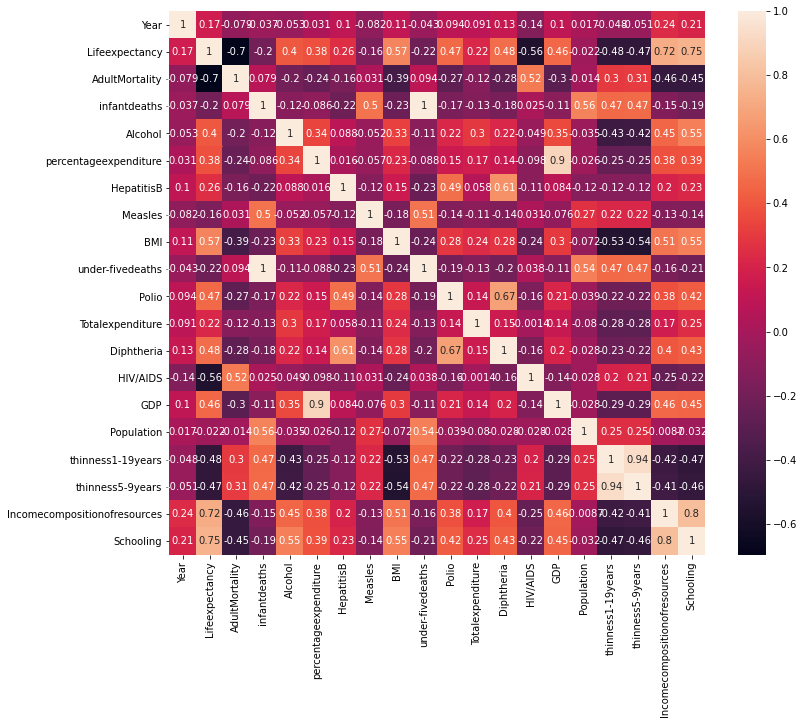

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

we observe that AdultMortality,BMI,HIV/AIDS,GDP,Diphtheria,Incomecompositionofresources and Schooling are correlated with lifeexpectency so we consider these variables for regression analysis

### Missing Value imputation

In [4]:
for i in range(df.shape[0]):
    if df.Lifeexpectancy.isna()[i]==True:
        if df.Status[i]=="Developing":
            df["Lifeexpectancy"][i]=df[df["Status"]=="Developing"].Lifeexpectancy.mean()
        else:
            df["Lifeexpectancy"][i]=df[df["Status"]=="Developed"].Lifeexpectancy.mean()
    

<ipython-input-4-9746aa3af430>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lifeexpectancy"][i]=df[df["Status"]=="Developing"].Lifeexpectancy.mean()


In [5]:
for i in range(df.shape[0]):
    if df.AdultMortality.isna()[i]==True:
        if df.Status[i]=="Developing":
            df["AdultMortality"][i]=df[df["Status"]=="Developing"].AdultMortality.mean()
        else:
            df["AdultMortality"][i]=df[df["Status"]=="Developed"].AdultMortality.mean()
    

<ipython-input-5-466902c48912>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AdultMortality"][i]=df[df["Status"]=="Developing"].AdultMortality.mean()


In [6]:
for i in range(df.shape[0]):
    if df.BMI.isna()[i]==True:
        if df.Status[i]=="Developing":
            df["BMI"][i]=df[df["Status"]=="Developing"].BMI.mean()
        else:
            df["BMI"][i]=df[df["Status"]=="Developed"].BMI.mean()
    

<ipython-input-6-c00d0c858462>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI"][i]=df[df["Status"]=="Developing"].BMI.mean()


In [7]:
for i in range(df.shape[0]):
    if df.Polio.isna()[i]==True:
        if df.Status[i]=="Developing":
            df["Polio"][i]=df[df["Status"]=="Developing"].Polio.mean()
        else:
            df["Polio"][i]=df[df["Status"]=="Developed"].Polio.mean()
    

<ipython-input-7-038bd52516ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Polio"][i]=df[df["Status"]=="Developing"].Polio.mean()


In [8]:
for i in range(df.shape[0]):
    if df.Diphtheria.isna()[i]==True:
        if df.Status[i]=="Developing":
            df["Diphtheria"][i]=df[df["Status"]=="Developing"].Diphtheria.mean()
        else:
            df["Diphtheria"][i]=df[df["Status"]=="Developed"].Diphtheria.mean()
    

<ipython-input-8-a490157ca7eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diphtheria"][i]=df[df["Status"]=="Developing"].Diphtheria.mean()


In [9]:
for i in range(df.shape[0]):
    if df["GDP"].isna()[i]==True:
        if df.Status[i]=="Developing":
            df["GDP"][i]=df[df["Status"]=="Developing"].GDP.mean()
        else:
            df["GDP"][i]=df[df["Status"]=="Developed"].GDP.mean()
    

<ipython-input-9-c7e063235bd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GDP"][i]=df[df["Status"]=="Developing"].GDP.mean()
<ipython-input-9-c7e063235bd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GDP"][i]=df[df["Status"]=="Developed"].GDP.mean()


In [10]:
for i in range(df.shape[0]):
    if df["thinness1-19years"].isna()[i]==True:
        if df.Status[i]=="Developing":
            df["thinness1-19years"][i]=df[df["Status"]=="Developing"]["thinness1-19years"].mean()
        else:
            df["thinness1-19years"][i]=df[df["Status"]=="Developed"]["thinness1-19years"].mean()

<ipython-input-10-2014589f700d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["thinness1-19years"][i]=df[df["Status"]=="Developing"]["thinness1-19years"].mean()


In [11]:
for i in range(df.shape[0]):
    if df["thinness5-9years"].isna()[i]==True:
        if df.Status[i]=="Developing":
            df["thinness5-9years"][i]=df[df["Status"]=="Developing"]["thinness5-9years"].mean()
        else:
            df["thinness5-9years"][i]=df[df["Status"]=="Developed"]["thinness5-9years"].mean()

<ipython-input-11-f7656e9984dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["thinness5-9years"][i]=df[df["Status"]=="Developing"]["thinness5-9years"].mean()


In [12]:
for i in range(df.shape[0]):
    if df["Incomecompositionofresources"].isna()[i]==True:
        if df.Status[i]=="Developing":
            df["Incomecompositionofresources"][i]=df[df["Status"]=="Developing"]["Incomecompositionofresources"].mean()
        else:
            df["Incomecompositionofresources"][i]=df[df["Status"]=="Developed"]["Incomecompositionofresources"].mean()

<ipython-input-12-45cd1c600b42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Incomecompositionofresources"][i]=df[df["Status"]=="Developing"]["Incomecompositionofresources"].mean()
<ipython-input-12-45cd1c600b42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Incomecompositionofresources"][i]=df[df["Status"]=="Developed"]["Incomecompositionofresources"].mean()


In [13]:
for i in range(df.shape[0]):
    if df["Schooling"].isna()[i]==True:
        if df.Status[i]=="Developing":
            df["Schooling"][i]=df[df["Status"]=="Developing"].Schooling.mean()
        else:
            df["Schooling"][i]=df[df["Status"]=="Developed"].Schooling.mean()

<ipython-input-13-991167170704>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Schooling"][i]=df[df["Status"]=="Developing"].Schooling.mean()
<ipython-input-13-991167170704>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Schooling"][i]=df[df["Status"]=="Developed"].Schooling.mean()


In [14]:
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                    0
AdultMortality                    0
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                               0
under-fivedeaths                  0
Polio                             0
Totalexpenditure                226
Diphtheria                        0
HIV/AIDS                          0
GDP                               0
Population                      652
thinness1-19years                 0
thinness5-9years                  0
Incomecompositionofresources      0
Schooling                         0
dtype: int64

<AxesSubplot:>

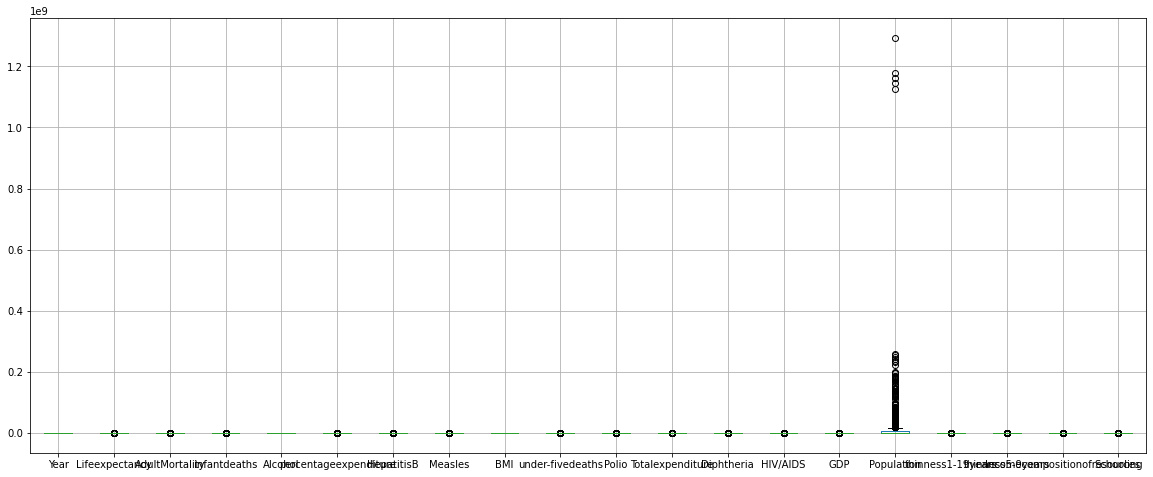

In [26]:
# Outlier Detection 
plt.figure(figsize=(20,8))
df.boxplot()

There is outliers present in the Population but we are not useing this variable for modelling

### Data prepare for Modelling

In [15]:
x=df[["AdultMortality","BMI","HIV/AIDS","GDP","Diphtheria",
      "Incomecompositionofresources","Schooling"]]
y=df["Lifeexpectancy"]

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Multiple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [18]:
ypred=model.predict(xtest)

In [19]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(ytest,ypred)
print("R_squared is :",r2)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.8126660996170832
MAE : 3.026452760725797
MSE : 16.71967017689054
RMSE : 4.088969329414264


Model gives 81% accuracy

### Assumptions

#### 1.Linearity between x and y

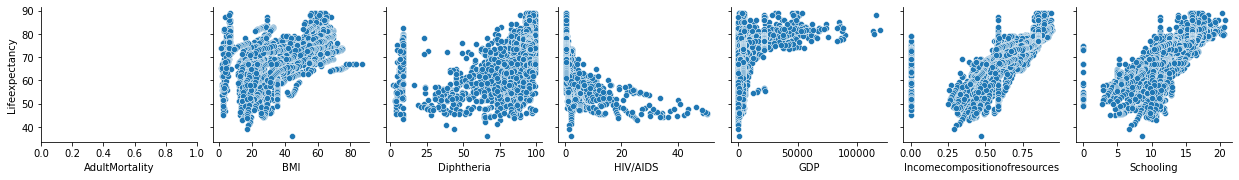

In [20]:
sns.pairplot(x_vars=["AdultMortality","BMI","Diphtheria","HIV/AIDS","GDP",
      "Incomecompositionofresources","Schooling"],y_vars=["Lifeexpectancy"],data=df)

#### 2.Multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d

In [23]:
get_vif(x)

{'AdultMortality': 3.190187940277023,
 'BMI': 6.882723624993876,
 'HIV/AIDS': 1.5472475010178828,
 'GDP': 1.6658780225936949,
 'Diphtheria': 13.147200779707903,
 'Incomecompositionofresources': 30.654883693856966,
 'Schooling': 38.881471107516866}

as VIF >10 for Incomecompositionofresources,Schooling,Diphtheria<br> 
hence we detect multicollinearity

In [24]:
x=x.drop(columns="Schooling")

In [25]:
get_vif(x)

{'AdultMortality': 3.137346545539069,
 'BMI': 6.438294878958282,
 'HIV/AIDS': 1.5447447886726822,
 'GDP': 1.6573886930401454,
 'Diphtheria': 11.51847546503143,
 'Incomecompositionofresources': 13.947263756885988}

droping schooling variable minimize the VIF and remove multicollinearity

#### Fitting Regression model

In [26]:
x=df[["AdultMortality","BMI","HIV/AIDS","GDP","Diphtheria",
      "Incomecompositionofresources"]]
y=df["Lifeexpectancy"]

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
ypred=model.predict(xtest)

In [30]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_lin=r2_score(ytest,ypred)
print("R_squared is :",r2_lin)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.7740924956956636
MAE : 3.2666905100635764
MSE : 20.162388946861558
RMSE : 4.490254886625208


#### 3.Homoscedasticity

In [31]:
ypred=model.predict(xtrain)
residuals=ytrain.values-ypred

Text(0, 0.5, 'Residuals')

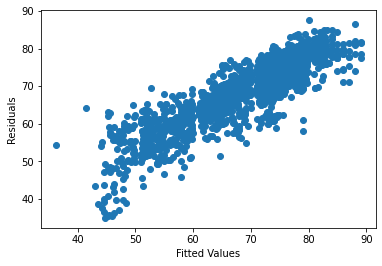

In [32]:
plt.scatter(ytrain.values,ypred)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

Heteroscedasticity is present 

#### 4.Normality

<AxesSubplot:ylabel='Count'>

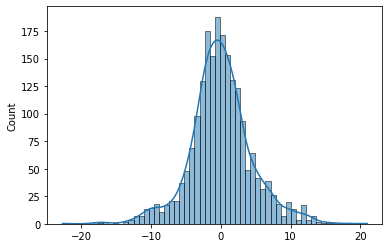

In [33]:
sns.histplot(residuals,kde=True)

Residuals are normal

#### 5.Zero mean

In [34]:
np.mean(residuals)

-1.000842297062865e-14

Resideual's mean is zero

#### 6.No Autocorrelation

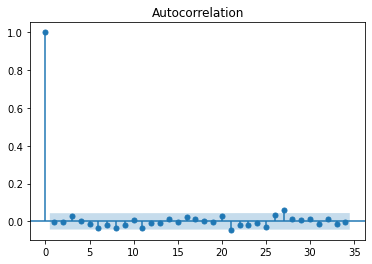

In [35]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals)
plt.show()

there is no autocorrelation in residuals

### MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_scale1=mm.fit_transform(x)
x_scale1=pd.DataFrame(x_scale1,columns=x.columns)

In [37]:
x_scale1.head()

,AdultMortality,BMI,HIV/AIDS,GDP,Diphtheria,Incomecompositionofresources
0,0.362881,0.209733,0.0,0.004889,0.649485,0.505274
1,0.373961,0.203940,0.0,0.005127,0.618557,0.502110
2,0.369806,0.198146,0.0,0.005287,0.639175,0.495781
3,0.375346,0.192352,0.0,0.005608,0.670103,0.488397
4,0.379501,0.187717,0.0,0.000519,0.680412,0.478903


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale1,y,test_size=0.2,random_state=1)

In [39]:
#After Scaling perform the Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [40]:
ypred=model.predict(xtest)

In [41]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_linmm=r2_score(ytest,ypred)
print("R_squared is :",r2_linmm)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.7628312534159705
MAE : 3.3224391324156266
MSE : 20.49444088057118
RMSE : 4.527078625401947


### StandardScalar

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scale2=ss.fit_transform(x)
x_scale2=pd.DataFrame(x_scale2,columns=x.columns)

In [43]:
x_scale2.head()

,AdultMortality,BMI,HIV/AIDS,GDP,Diphtheria,Incomecompositionofresources
0,0.791063,-0.962923,-0.323445,-0.508902,-0.732279,-0.726590
1,0.855546,-0.988015,-0.323445,-0.506773,-0.859200,-0.741084
2,0.831365,-1.013107,-0.323445,-0.505347,-0.774586,-0.770071
3,0.863607,-1.038199,-0.323445,-0.502487,-0.647665,-0.803890
4,0.887788,-1.058272,-0.323445,-0.547880,-0.605358,-0.847371


In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale2,y,test_size=0.2,random_state=1)

In [45]:
#After Scaling perform the Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [46]:
ypred=model.predict(xtest)

In [47]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_linss=r2_score(ytest,ypred)
print("R_squared is :",r2_linss)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.7628312534159706
MAE : 3.3224391324156253
MSE : 20.494440880571172
RMSE : 4.527078625401946


### Polynomial Regression

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg=PolynomialFeatures(degree=3)
xtrain_poly=pol_reg.fit_transform(xtrain)

In [50]:
model=LinearRegression()
model.fit(xtrain_poly,ytrain)

LinearRegression()

In [51]:
xtest_poly=pol_reg.fit_transform(xtest)
ypred=model.predict(xtest_poly)

In [52]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_pol=r2_score(ytest,ypred)
print("R_squared is :",r2_pol)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.9051854917210606
MAE : 1.9952865814632927
MSE : 8.462255380193254
RMSE : 2.908995596454772


after performing polynomial regression accuracy inhance by 13% and gives 90%

### Polynomial Perform on Scaling Dataset

In [53]:
# Using MinMaxScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale1,y,test_size=0.2,random_state=1)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg=PolynomialFeatures(degree=3)
xtrain_poly=pol_reg.fit_transform(xtrain)

In [55]:
model=LinearRegression()
model.fit(xtrain_poly,ytrain)

LinearRegression()

In [56]:
xtest_poly=pol_reg.fit_transform(xtest)
ypred=model.predict(xtest_poly)

In [57]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_polmm=r2_score(ytest,ypred)
print("R_squared is :",r2_polmm)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.916328981530322
MAE : 1.8908170331261993
MSE : 7.230255951268176
RMSE : 2.688913526178961


In [58]:
# Using StandardScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale2,y,test_size=0.2,random_state=1)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg=PolynomialFeatures(degree=3)
xtrain_poly=pol_reg.fit_transform(xtrain)

In [60]:
model=LinearRegression()
model.fit(xtrain_poly,ytrain)

LinearRegression()

In [61]:
xtest_poly=pol_reg.fit_transform(xtest)
ypred=model.predict(xtest_poly)

In [62]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_polss=r2_score(ytest,ypred)
print("R_squared is :",r2_polss)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.9163289815303227
MAE : 1.8908170331261838
MSE : 7.230255951268126
RMSE : 2.6889135261789523


### Ridge and Lasso

In [63]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [65]:
model=Ridge(alpha=0.1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [66]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_rid=r2_score(ytest,ypred)
print("R_squared is :",r2_rid)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.7740839847989176
MAE : 3.267359192484785
MSE : 20.163148549828296
RMSE : 4.490339469330609


In [67]:
model=Lasso(alpha=0.1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [68]:
#model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_lass=r2_score(ytest,ypred)
print("R_squared is :",r2_lass)
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

R_squared is : 0.7675193351652332
MAE : 3.3750259506383595
MSE : 20.74904771958721
RMSE : 4.555112262018052


In [69]:
result=pd.DataFrame()
result["Algoritham"]=["Linear Regression","Linear Regression(MinMax)","Linear Regression(StandardScaler)",
                      "Polynomial regression","Polynomial regression(MinMax)","Polynomial regression(StandardScaler)","Ridge","Lasso"]
result["Accuracy"]=[r2_lin,r2_linmm,r2_linss,r2_pol,r2_polmm,r2_polss,r2_rid,r2_lass]

### Model performance

In [70]:
result

,Algoritham,Accuracy
0,Linear Regression,0.774092
1,Linear Regression(MinMax),0.762831
2,Linear Regression(StandardScaler),0.762831
3,Polynomial regression,0.905185
4,Polynomial regression(MinMax),0.916329
5,Polynomial regression(StandardScaler),0.916329
6,Ridge,0.774084
7,Lasso,0.767519


### Conclusion:
>Among all regression models  Polynomial regression(MinMax/StandardScaler) model has high R^2 value.<br>
We use Polynomial regression(MinMax/StandardScaler) model for predicting life expectancy.